## <font color="darkblue">Introduction</font>
This slide is generated according to the lesson from ["Handling Imbalanced Datasets SMOTE Technique"](https://www.youtube.com/watch?v=dkXB8HH_4-k&list=PLyQnbMWK6HUVWtYO8H2SRZLFc99oznMYU):
* [youtube_ai_ml/SMOTE - Handling Imbalance Dataset.ipynb](https://github.com/ashokveda/youtube_ai_ml/blob/master/SMOTE%20-%20Handling%20Imbalance%20Dataset.ipynb)
* [youtube_ai_ml/car_evaluation.csv](https://github.com/ashokveda/youtube_ai_ml/blob/master/car_evaluation.csv)

## <font color='darkblue'>What's imbalanced data and how it impact ML</font>
Consider we have a data set with labeling as `Cancer` (100 records) and `No Cancer` (900 records). Here we have an imbalanced category ratio and Label `Cancer` is a majority and label `No Cancer` is a minority. There is no clear definition for how larger a ration can we call the dataset as an imbalanced dataset. <b>You can choose to deal with this problem or not according to how great impact it brings to the performance of your machine learning model</b>.
![imbalanced data](images/1.PNG) <br/>

There are some well-known approaches such as "<b>Under sampling</b>", "<b>Over sampling</b>" and "<b>SMOTE</b>"


### <font color='darkgreen'>Under sampling</font>
We can do sampling the data of majority category to let it has same amount of data as minority category. However, the data itself is precious and we may waste our data by taking this approach.<br/>
![imbalanced data](images/2.PNG) <br/>

### <font color='darkgreen'>Over sampling</font>
For over sampling, we try to make the amount of data from minority category to as much as the data of majority category.<br/>
![imbalanced data](images/3.PNG) <br/>

### <font color='darkgreen'>SMOTE</font>
<b>[SMOTE](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis#SMOTE)</b> is the abbreviation of "Synthetic Minority Over-sampling Technique". It will generate data (orange color) based on distribution of minority (red color) to let minority category to have as much data as the majority category:<br/>
![imbalanced data](images/4.PNG) <br/>


## <font color='darkblue'>How To Apply SMOTE</font>
Let's check a simple example to see how it works.

### <font color='darkgreen'>Loading Data</font>
First of all, let's load in the dataset:

In [1]:
import pandas as pd

data = pd.read_csv('car_evaluation.csv')
data.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


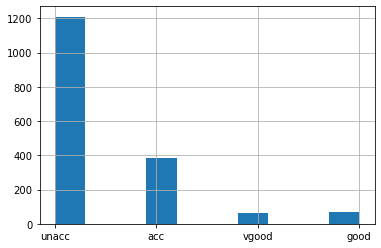

In [16]:
# We can observe from the labeling distribution to learn that this data is imbalanced.
# The majority outcome/category is "unacc"
data['outcome'].hist();

### <font color='darkgreen'>Performance without SMOTE</font>
Now we conduct the training on the original dataset to see how it goes:

In [3]:
X = data.iloc[:,:-1]
y = data.outcome
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [4]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['buying','maint','lug_boot','safety']] = \
X.loc[:,['buying','maint','lug_boot','safety']].apply(enc.fit_transform)
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = \
train_test_split(X,y,test_size=0.3,random_state=10)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
len(list(filter(lambda e: e=='good', y_predict)))  # Number of prediction as "good"

14

In [7]:
from sklearn.metrics import accuracy_score
print("Training without SMOTE with accuracy: {:.02f}%".format(100* accuracy_score(y_test,y_predict)))
pd.crosstab(y_test, y_predict)

Training without SMOTE with accuracy: 92.87%


col_0,acc,good,unacc,vgood
outcome,,,,
acc,89,2,11,0
good,10,10,1,0
unacc,5,0,366,0
vgood,5,2,1,17


In [8]:
def get_precision_and_recall(y_test, y_predict, label):
    tp, tn, fp, fn = 0, 0, 0, 0
    for ans, pred in zip(y_test, y_predict):
        if ans == label and pred == label:
            tp += 1
        elif ans == label and pred != label:
            fn += 1
        elif ans != label and pred == label:
            fp += 1
        else:
            tn += 1
            
    return tp / (tp + fp), tp / (tp + fn)

In [9]:
# Check the performance by each category
for cate in ["acc", "good", "unacc", "vgood"]:
    p, r = get_precision_and_recall(y_test, y_predict, cate)
    print("Category={} with precision={:.02f}; recall={:.02f}".format(cate, p, r))

Category=acc with precision=0.82; recall=0.87
Category=good with precision=0.71; recall=0.48
Category=unacc with precision=0.97; recall=0.99
Category=vgood with precision=1.00; recall=0.68


The performance (accuracy) of original dataset looks fine as below :
![imbalanced data](images/5.PNG) <br/>

### <font color='green'>Performance without SMOTE</font>
Now, let's use SMOTE from <b>[package imblean](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html)</b> to deal with imbalanced data here:

In [10]:
!pip install imblearn

You should consider upgrading via the 'c:\users\johnlee\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [12]:
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

In [13]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({'unacc': 839, 'acc': 282, 'good': 48, 'vgood': 40})
After SMOTE : Counter({'acc': 839, 'unacc': 839, 'vgood': 839, 'good': 839})


In [14]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9383429672447013


col_0,acc,good,unacc,vgood
outcome,,,,
acc,89,8,3,2
good,1,20,0,0
unacc,14,1,355,1
vgood,0,2,0,23


In [15]:
# Check the performance by each category
for cate in ["acc", "good", "unacc", "vgood"]:
    p, r = get_precision_and_recall(y_test, y_predict, cate)
    print("Category={} with precision={:.02f}; recall={:.02f}".format(cate, p, r))

Category=acc with precision=0.86; recall=0.87
Category=good with precision=0.65; recall=0.95
Category=unacc with precision=0.99; recall=0.96
Category=vgood with precision=0.88; recall=0.92


From below result, we learned that SMOTE can help our model to perform better than original dataset:
![imbalanced data](images/6.PNG) <br/>

## <font color='darkblue'>Supplement</font>
* [Confusion Matrix in Machine Learning](https://www.geeksforgeeks.org/confusion-matrix-machine-learning/)
* [Aditya Lahiri: Dealing With Imbalanced Classes in Machine Learning | PyData New York 2019](https://www.youtube.com/watch?v=6M2d2n-QXCc&t=782s)